## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [68]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [67]:
reviews_copy = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [4]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [21]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [69]:
reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)
reviews = reviews.dropna()

In [70]:
# one hot encoding
content_rating = pd.get_dummies(reviews['Content Rating'])
app_type = pd.get_dummies(reviews['Type'])

reviews = pd.concat([reviews, content_rating], axis=1)
reviews = pd.concat([reviews, app_type], axis=1)

In [71]:
reviews.drop(reviews['Content Rating'].value_counts().index[1], axis=1, inplace=True)
reviews.drop(reviews['Type'].value_counts().index[1], axis=1, inplace=True)
reviews.drop(['Type','Content Rating'], axis=1, inplace=True)

In [72]:
# conversion
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'], errors='coerce')
reviews['Price'] = pd.to_numeric(reviews['Price'], errors='coerce')
reviews = reviews.dropna()

In [73]:
# train-test split
X = reviews.drop('Rating', axis=1)
y = reviews.Rating

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# quantile transformer
qt = QuantileTransformer()
X_train_t = qt.fit_transform(X_train)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [50]:
import statsmodels.api as sm

X_con = sm.add_constant(X_train_t)
results = sm.OLS(Y_train, X_con).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     69.07
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.49e-84
Time:                        18:10:14   Log-Likelihood:                -5027.9
No. Observations:                6975   AIC:                         1.007e+04
Df Residuals:                    6968   BIC:                         1.012e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9819      0.012    331.638      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [75]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8719 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           8719 non-null   float64
 1   Reviews          8719 non-null   int64  
 2   Price            8719 non-null   float64
 3   Adults only 18+  8719 non-null   uint8  
 4   Everyone         8719 non-null   uint8  
 5   Everyone 10+     8719 non-null   uint8  
 6   Mature 17+       8719 non-null   uint8  
 7   Unrated          8719 non-null   uint8  
 8   Free             8719 non-null   uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 323.6 KB


In [76]:
# model with Free and Everyone
X_con = sm.add_constant(X_train_t)
results = sm.OLS(Y_train, X_con).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     70.11
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           3.97e-85
Time:                        18:38:57   Log-Likelihood:                -4948.9
No. Observations:                6975   AIC:                             9912.
Df Residuals:                    6968   BIC:                             9960.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9746      0.021    186.353      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [52]:
# Mature 17+ and Reviews are the only variables that would help construct a better model
# train-test split
X_new = reviews[['Mature 17+','Reviews']]
y_new = reviews.Rating

X_train_new, x_test_new, Y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

In [53]:
X_train_new_t = qt.fit_transform(X_train_new)

In [54]:
X_con_new = sm.add_constant(X_train_new_t)
results_new = sm.OLS(Y_train_new, X_con_new).fit()
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           2.00e-85
Time:                        18:17:08   Log-Likelihood:                -4951.7
No. Observations:                6975   AIC:                             9909.
Df Residuals:                    6972   BIC:                             9930.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9930      0.012    337.517      0.0

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

In [ ]:
rating

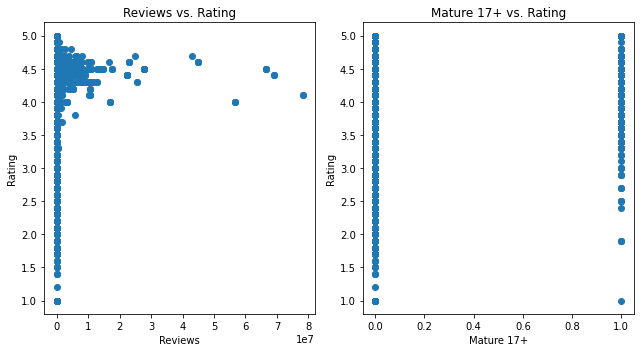

In [66]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.scatter(x=reviews['Reviews'], y=reviews['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Reviews vs. Rating')

plt.subplot(1,2,2)
plt.scatter(x=reviews['Mature 17+'], y=reviews['Rating'])
plt.xlabel('Mature 17+')
plt.ylabel('Rating')
plt.title('Mature 17+ vs. Rating')
plt.tight_layout()
plt.show()

>*The Reviews variable have some predictive power but not enough to drive the Rating since Rating itself is right-skewed. As for Mature 17+, it does not hold any predictive power over Rating since it is only a classifier and there is a certain breakpoint for those that are rated Mature 17+ at around a Rating of 2.7.*

What data processing could you do to improve this model? Experiment.

>*Including some removed features, namely, Category and Installs would have helped further to determine by how much does Reviews and Mature 17+ classification determine the Rating considering that there is a perceivable relationship between them and Rating.*

*One-hot encoding Category and cleaning Installs would help in visualizing this data more.*